# Fitovanje podataka

> U ovoj svesci ćemo demostrirati fitovanje podataka, pokazati smisao srednjeg kvadratnog odstupanja kao mere kvaliteta fita i pokazati šta znači da model premalo ili previše dobro fituje (_under-_ i _over-fitting_).  

Ukoliko za empirijske podatke postoji teorijski model, onda sigurno znamo i jednačinu koja povezuje zavisno i nezavisno promenljivu. To je tipičan slučaj kada u istraživanju imamo sve elemente naučnog metoda uključujući posmatranje, postavljanje hipoteze i dizajniranje eksperimenta. Međutim, nauka o podacima i mašinsko učenje su primene analize podataka na podacima za koje ne moramo da znamo teorijski okvir. Najbolji model mašinskog učenja ne pretenduje da bude naučno objašnjenje pojave već samo model koji u konkretnom slučaju daje dobru predikciju rezultata.

Fitovanje podataka u slučajevima kada znamo jednačinu koja povezuje zavisno i nezavisno promeljivu je jednoznačno određeno. Bez teorijskog modela, odnosno poznavanja te veze za fitovanje podatka možemo da koristimo različite modele i vidimo koji je najverodostojniji. Svakako prvo počinjemo od najjednostavnijeg modela, linearnog.

## Linearni model

Linearni model je najčešće korišćen model predikcije, ne samo u mašinskom učenju već u nauci uopšte. Pomoću ovog modela se određuju parametri linearne funkcije koja opisuje zavisnost jedne kontinualne promenljive od druge. Ovaj model se često naziva i linearna regresija. Postoji nekoliko načina za pravljenje linearnih modela. Mi ćemo ovde pokušati da prikažemo najjednostavniji, tj. onaj koji ne učitava biblioteku za mašinsko učenje samo zato da bi uradio linearan fit. Biblioteka __numpy__ ima funkcije koje mogu da nam pomognu.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Za potrebe ove vežbe koristićemo veštački generisane, odnosno simulirane podatke. Uzećemo tačno određenu vezu između nezavisne (x) i zavisno promenljive (y). Da bi zadatak bio malo realniji dodaćemo i malo šuma.

Za potrebe simulacije bazirane na pseudo-slučajnim brojevima potreban nam je modul __random__ iz biblioteke __numpy__. Pomoću funkcije `rand()` ovog modula ćemo generisati niz od `n=10` slučajnih _float_ brojeva između 0 i 3. Primetite da ovaj niz nije lista nego niz tipa _array_ jer takve generiše __numpy__. 

In [2]:
from numpy import random

In [3]:
n=10
x=random.rand(n)*3

In [4]:
x

array([0.8252298 , 0.33469961, 2.73280962, 1.04388037, 1.61004343,
       0.91778589, 0.65118009, 2.81281275, 2.6520401 , 0.94745754])

Za dalji rad će nam biti potrebno da ovaj niz bude uređen, odnosno sortiran on najmanje vrednosti. Funkcija `sort()` sortira niz i modifikuje ga. Dovoljno je da aktiviramo `x.sort()` pa da niz __x__ bude sortiran.

In [5]:
x.sort()

Uzećemo da kvadratna funkcija povezuje x i y, tj. da je $y=2x^2-2x+5$. Da zavisnost ne bi bila sasvim očigledna generisaćemo šum, odnosno niz __noise__ kao niz slučajnih brojeva između 0 i 1,5. Vrednost tog šuma ćemo dodati na vrednost dobijenu kvadratnom funkcijom.

In [6]:
noise=np.random.rand(n)*1.5
y = 2*(x**2) - 2*x - 5 + noise

Sada pošto imamo i __x__ i __y__ možemo da fitujemo podatke linearnom funkcijom. To ćemo uraditi pomoću funkcije `polyfit()` koja služi za fitovanje polinomom bilo kog reda. Ako stavimo kao argument broj 1, taj polinom će biti prvog reda, odnosno linearna funkcija. Koeficijenti linearne funkcije će biti sačuvani u objektu koji smo nazvali __model1__. Sa tim koeficijentima možemo da, pomoću funkcije `poly1d()` koja od koeficijenata polinoma pravi polinom, da definišemo pomoćnu funkciju `model1_fn()` koja će nam biti potrebna kasnije. Ta funkcija će za svaku vrednost promenljive __x__ davati predikciju vrednosti promenljive __y__. 

In [7]:
model1=np.polyfit(x,y,1)
model1_fn=np.poly1d(model1)

Biće potrebno da nacrtamo i tačke (__x__,__y__) i krivu __model1_fn__ da bismo videli kako traženi model fituje podatke. Da bi bilo lakše da ocenimo kvalitet fita, ovom grafiku ćemo dodati i reziduale, odnosno razlike između stvarnih vrednosti za __y__ i vrednosti koje smo prognozirali pomoću modela.

Tehnička napomena: Pomoćne promenljive __xfit__ i __yfit__ su uvedene da bi se funkcija prikazala kao linija, odnosno da bi rezolucija pri crtanju krive bila bolja. Interval od 0 do 3 smo podelili na 100 intervala pomoću funkcije `linspace()`.

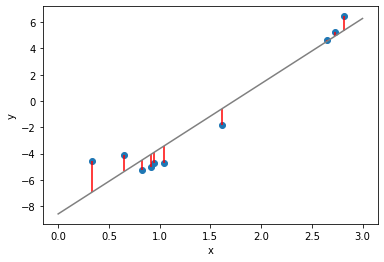

In [8]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

xfit = np.linspace(0, 3, 100)
yfit = model1_fn(xfit)
plt.plot(xfit,yfit,color="gray")

plt.vlines(x=x, ymin=y, ymax=model1_fn(x), colors='red');

Kvalitet fita možemo da opišemo na mnogo načina. Često se za to koristi koeficijent korelacije. Ovde nam je zgodnije da koristimo srednji kvadrat odstupanja (MSE od eng. _mean square error_) kao meru koja može lepo da se vizuelizuje. Što je vrednost MSE manja, to je fit bolji. Vidimo na grafiku kolike su vrednosti odstupanja za svaku tačku (crvene linije). Sve te vrednosti treba kvadrirati, sabrati i podeliti sa n. Konkretno za ovaj linearni fit, srednje kvadratno odstupanje je:

In [9]:
rez=np.poly1d(model1)(x)-y
sum(rez**2)/n

1.387198821329099

### Kvadratna funkcija

Pošto znamo kako smo generisali podatke, znamo i da postoji boji fit od linearnog modela. Kvadratna funkcija će sigurno imati manja odstupanja stvarne i prognozirane vrednosti __y__. Za to ćemo koristiti istu funkciju `polyfit()` samo što će sada argument koji se odnosi na red polinoma biti 2. Na sledećem grafiku ćemo nacrtati krivu dobijenu ovakvim fitom.

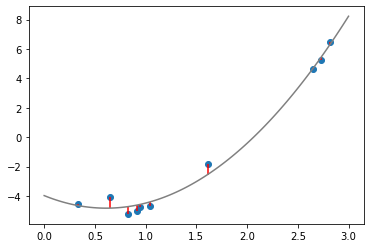

In [10]:
plt.scatter(x, y);

model2=np.polyfit(x,y,2)
model2_fn=np.poly1d(model2)

xfit = np.linspace(0, 3, 100)
yfit = model2_fn(xfit)
plt.plot(xfit,yfit,color="gray")

plt.vlines(x=x, ymin=y, ymax=model2_fn(x), colors='red')

Očekivano, ovde su rezidualni mnogo manji tako da se crvene linije jedva primećuju. Srednje kvadratno odstupanje je ovde sigurno manje:

In [11]:
rez=np.poly1d(model2)(x)-y
sum(rez**2)/n

0.17203069418101

Lako je ovde biti pametan i zaključiti da je kvadratna funkcija odličan model za podatke koje smo prvobitno generisali koristeći kvadratnu funkciju. U realnom slučaju, to naravno nije tako. Mi ne znamo kakva je prava zavisnost i možemo samo da je pretpostavimo na osnovu fitovanja različitim modelima.

## Testiranje modela

U realnom slučaju fitovanje radimo na poznatom uzorku, a predikcije radimo za nepoznate tačke. To je poenta korišćenja modela. Greška koju načinimo predviđajući vrednosti zavisno promenljive u situacijama gde ne možemo da ih izmerimo ili koje se još nisu dogodile je prava mera uspešnosti modela. Ovde ćemo simulirati upravo takvu situaciju za četiri različita modela. Uporedićemo srednje kvadratne greške kako bismo utvrdili koji je model najbolji.

Za početak, podelićemo ceo skup tačaka (__x__,__y__) na dva dela: na uzorak na kom fitujemo funkciju (__learn__) i ostatak skupa koji koristimo za testiranje modela (__test__). Konkretno, koristićemo funkciju `sample()` iz biblioteke __random__ da dobijemo slučajan izorak koji čini polovina početnog skupa. Izraz `n//2` označava celobrojnu vrednost deljenja promenljive __n__ sa 2.

Napomena: Biblioteka __random__ nema nikakve veze sa funkcijom istog imena koju smo uzeli iz biblioteke __numpy__. Slučajno imaju isto ime.

In [12]:
from random import sample

In [13]:
learn=sample(range(n),n//2)
test=list(set(range(n))-set(learn))

In [14]:
xl=x[learn]
xt=x[test]

yl=y[learn]
yt=y[test]

Za deo skupa koji smo označili sa __learn__ fitovaćemo četiri polinomijalne funkcije prvog, drugog, trećeg i četvrtog reda i tako odrediti koeficijente ovih modela. Potom ćemo za svaki od tih modela napraviti funkciju koja daje predikciju promenljive __y__.

In [15]:
m1=np.polyfit(xl,yl,1)
m2=np.polyfit(xl,yl,2)
m3=np.polyfit(xl,yl,3)
m4=np.polyfit(xl,yl,4)

In [16]:
m1_fn=np.poly1d(m1)
m2_fn=np.poly1d(m2)
m3_fn=np.poly1d(m3)
m4_fn=np.poly1d(m4)

Zbog prikaza ovih funkcija uzimamo uređen niz vrednosti nezavisno promenljive (__xfit__) i za svaku vrednost izračunavamo vrednost zavisno promenljive po različitim modelima. 

In [17]:
xfit = np.linspace(0, 3, 100)
y1fit = m1_fn(xfit)
y2fit = m2_fn(xfit)
y3fit = m3_fn(xfit)
y4fit = m4_fn(xfit)

Reziduale i srednja kvadratna odstupanja računamo samo za tačke iz skupa __test__. Njih želimo da uporedimo.

In [18]:
rez1=np.poly1d(m1)(xt)-yt
r1=sum(rez1**2)/len(xt)
rez2=np.poly1d(m2)(xt)-yt
r2=sum(rez2**2)/len(xt)
rez3=np.poly1d(m3)(xt)-yt
r3=sum(rez3**2)/len(xt)
rez4=np.poly1d(m4)(xt)-yt
r4=sum(rez4**2)/len(xt)

Na sledećoj slici ćemo prikazati grafike za sva četiri modela, redom od polinoma prvog do polinoma četvrtog stepena. Plave tačke prikadaju skupu __learn__, a narandžaste skupu __test__. Iznad grafika je prikazana odgovarajuća vrednost srednjeg kvadratnog odstupanja, __MSE__.

Text(0.5, 1.0, 'MSE=15.8')

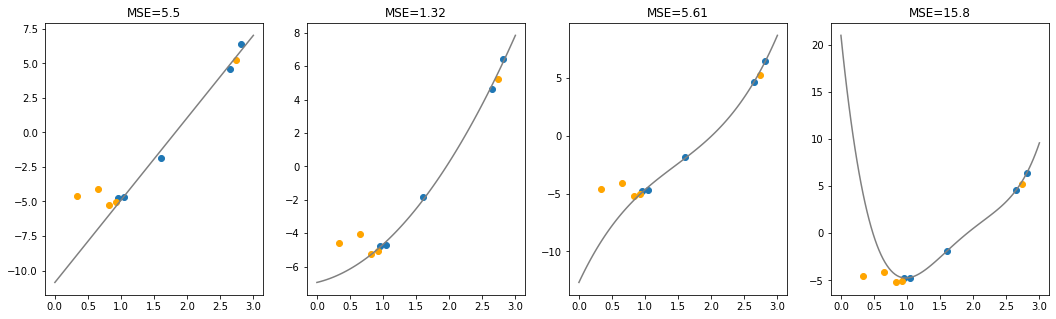

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 5))
ax[0].scatter(xl, yl)
ax[0].plot(xfit,y1fit,color="gray")
ax[0].scatter(xt,yt,color="orange")
ax[0].set_title(f"MSE={r1:.3}")

ax[1].scatter(xl, yl)
ax[1].plot(xfit,y2fit,color="gray")
ax[1].scatter(xt,yt,color="orange")
ax[1].set_title(f"MSE={r2:.3}")

ax[2].scatter(xl, yl)
ax[2].plot(xfit,y3fit,color="gray")
ax[2].scatter(xt,yt,color="orange")
ax[2].set_title(f"MSE={r3:.3}")

ax[3].scatter(xl, yl)
ax[3].plot(xfit,y4fit,color="gray")
ax[3].scatter(xt,yt,color="orange")
ax[3].set_title(f"MSE={r4:.3}")


Ako pažljivo pogledamo grafike, videćemo da polinom prvog reda, odnosno linearna funkcija, ima najveća odstupanja od tačaka iz skupa __learn__. Najbolje je slaganje za polinom najvišeg reda gde sve plave tačke leže baš na krivoj kojom smo fitovali podatke. Ovde je odstupanje tačaka iz __learn__ uzorka od polinoma četvrtog reda jednaka nuli. Međutim, nas više interesuje koliko će tačke odstupati od funkcije za skup kojim testiramo modele. Narandžaste tačke, verovatno (ipak je ovo simulacija na skromnom uzorku) najmanje odstupaju za polinom drugog reda. 

Pojava da funkcija ne prati dovoljno dobro trend tačaka iz uzorka zbog čega su odstupanja za testni skup velika naziva se _under-fitting_. To svakako nije dobro, ali ni druga krajnost nije dobra. Kada funkcija previše dobro prati tačke iz uzorka, greške za testni skup opet postaju velike. Ta pojava se naziva _over-fitting_. Mi unapred, bez poznavanja vrednosti za testni skup, ne može da znamo koji je model najbolji, ali je očekivano da to najjednostavniji model koji prati trend tačaka. Treba se čuvati obe krajnosti.

Složenost modela ne zavisi samo od složenosti funkcije već i od broja nezavisno promenljivih. Mi smo ovde radili samo sa jednom nezavisno promenljivom, __x__, ali kod mašinskog učenja taj broj može biti mnogo veći. U takvim slučajevima moramo da uradimo odabir promenljivih koje uključujemo u model (_feature selection_). Premalo nije dobro, ali nije ni previše. _Under-fitting_ i _over-fitting_ su standarni izazovi za mašinsko učenje. Uvek treba tražiti modele koji uključuju samo zaista važne promenljive i gde su funkcije koje ih povezuju što jednostavnije.

### Preporučena literatura

Mirko Stojiljković, 2018, [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)